## Problem Set 04B - Knapsack Problem con Simulated Annealing

Resolveremos el mismo problema del Problem Set anterior pero con Simulated Annealing

### Ejercicio 1: Completa las funciones de costo e inicialización como lo hiciste en el problem set anterior. Crea la función `KS_neighbour`

In [1]:
def KS_isvalid(solution, object_volumes, KS_volume):
    return np.sum(solution*object_volumes)<=KS_volume

def KS_initialize_population(n_individuals, object_volumes, KS_volume):

    # TU CODIGO AQUI
    r = []
    for i in range(n_individuals):
        bandera=True
        solucion=np.zeros(len(object_volumes))
        while(bandera):
            col=np.random.randint(len(object_volumes)+1)
            previa=solucion
            previa[col-1]=1
           
            if(KS_isvalid(previa, object_volumes, KS_volume)):
                solucion[col-1] = 1
            else:
                solucion[col-1] = 0
                bandera=False

        r.append(solucion)
#     print np.array(r).astype(int)
    return np.array(r).astype(int)


def KS_cost(solution, object_values, object_volumes, KS_volume):

    # TU CODIGO AQUI
    Vmax=np.sum(object_values)
    Sx=np.sum(solution*object_volumes)
    Vx=np.sum(solution*object_values)
    if(Sx<=KS_volume):
        cost=Vmax-Vx
    else:
        cost=Vmax          
    return cost

def KS_neighbour(solution, object_volumes, KS_volume):
    # TU CODIGO AQUI
    i1 = np.random.randint(len(solution))
    i2 = i1+1 if i1<len(solution)-1 else 0
#     print i1 ,i2
    r = np.copy(solution)   
    r[i1]=solution[i2]
    r[i2]=solution[i1]   
    return r

### Ejercicio 2: Define las condiciones iniciales del problema KS como en el Problem Set anterior

In [2]:
%run code/sa.py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_objects         = 10
max_object_value  = 100
max_object_volume = 40
KS_volume         = 150

object_values  = np.random.randint(max_object_value-1, size=n_objects)+1 
object_volumes = np.random.randint(max_object_volume-1, size=n_objects)+1 


print "total volume of objects", np.sum(object_volumes)
print "knapsack max volume    ", KS_volume
print "total value of objects ", np.sum(object_values)

print object_values
print object_volumes

total volume of objects 240
knapsack max volume     150
total value of objects  637
[76 88 96 63 68 10 40 98 88 10]
[13 36 23 11 13 30 15 29 32 38]


### Ejercicio 3: Ejecuta el algoritmo con:

- 10 individuos y 50 pasos de enfriamiento
- 100 individuos y 500 pasos de enfriamiento
- 100 individuos y 5000 pasos de enfriamiento

best knapsack is [0 1 1 1 1 0 0 1 1 0] cost 136 value 501 volume 144


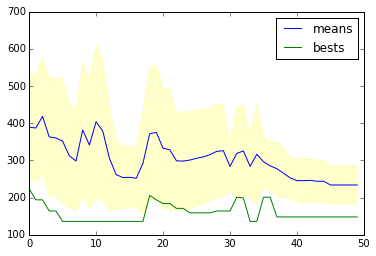

In [4]:
%run code/sa.py

n_individuals   = 10 
n_cooling_steps = 50



bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals , 
                                     n_cooling_steps            = n_cooling_steps , 
                                     init_population_function   = lambda x: KS_initialize_population(x, object_volumes, KS_volume) , 
                                     cost_function              = lambda x: KS_cost(x, object_values, object_volumes, KS_volume),
                                     generate_neighbor_function = lambda x:  KS_neighbour(x,  object_volumes, KS_volume)  )

print "best knapsack is", bestsol, "cost", np.min(bests), "value", np.sum(bestsol*object_values), "volume", np.sum(bestsol*object_volumes)
plot_evolution(bests, means, stds)

best knapsack is [1 0 1 1 1 0 1 1 1 0] cost 108 value 529 volume 136


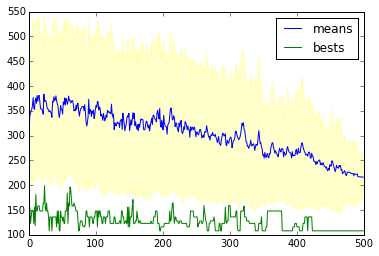

In [7]:
%run code/sa.py

n_individuals   = 100
n_cooling_steps = 500



bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals , 
                                     n_cooling_steps            = n_cooling_steps , 
                                     init_population_function   = lambda x: KS_initialize_population(x, object_volumes, KS_volume) , 
                                     cost_function              = lambda x: KS_cost(x, object_values, object_volumes, KS_volume),
                                     generate_neighbor_function = lambda x:  KS_neighbour(x,  object_volumes, KS_volume)  )

print "best knapsack is", bestsol, "cost", np.min(bests), "value", np.sum(bestsol*object_values), "volume", np.sum(bestsol*object_volumes)
plot_evolution(bests, means, stds)

best knapsack is [1 1 1 1 1 0 1 1 0 0] cost 108 value 529 volume 140


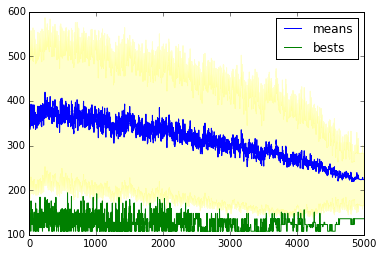

In [8]:
%run code/sa.py

n_individuals   = 100
n_cooling_steps = 5000



bestsol, bests, means, stds = run_sa(n_individuals              = n_individuals , 
                                     n_cooling_steps            = n_cooling_steps , 
                                     init_population_function   = lambda x: KS_initialize_population(x, object_volumes, KS_volume) , 
                                     cost_function              = lambda x: KS_cost(x, object_values, object_volumes, KS_volume),
                                     generate_neighbor_function = lambda x:  KS_neighbour(x,object_volumes, KS_volume)  )

print "best knapsack is", bestsol, "cost", np.min(bests), "value", np.sum(bestsol*object_values), "volume", np.sum(bestsol*object_volumes)
plot_evolution(bests, means, stds)